## Software Tools & Techniques in AI


TeamNo: 20

Chinmay Pendse (23110245)

Bhamare Dakshata(23210027)


#Section1

In [ ]:
pip install scikeras

In [ ]:
#importing neccesary libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import wandb
from wandb.integration.keras import WandbCallback
from sklearn.model_selection import train_test_split, ParameterGrid, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import os


In [ ]:

#initializing wandb to track experiment

wandb.init(project="mlp-iris_a6", name="MLP_Iris_Model_a6", config={
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 100,
    "architecture": "MLP",
    "layers": [
        {"type": "Dense", "units": 16, "activation": "relu"},
        {"type": "Dense", "units": 3, "activation": "softmax"}
    ]
})

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: bhamare-dakshata (bhamare-dakshata-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
data = load_iris()    #loadig iris data
X = data.data
y = data.target.reshape(-1, 1)

# one-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [ ]:
data   #printing data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
from sklearn.model_selection import train_test_split, ParameterGrid, RandomizedSearchCV
#making train test split as per given instruction
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [ ]:
#transforming data(Normalize feature values to [0,1] using standard scaling.)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
!pip install --upgrade tensorflow keras wandb
# upgrading to avoid any disruption

In [ ]:
#constructing a Multi-Layer Perceptron (MLP) model with the following architecture:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(3, activation='softmax', name='output_layer')
])

# compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#storing in history
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=wandb.config.epochs,
    batch_size=wandb.config.batch_size,
    callbacks=[WandbCallback(log_weights=True, log_gradients=False,save_model=False,save_graph=False)]
)

# saving Model
model.save("mlp_iris_model_a6.h5")

# evaluating Model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

wandb: WARNING WandbCallback is deprecated and will be removed in a future release. Please use the WandbMetricsLogger, WandbModelCheckpoint, and WandbEvalCallback callbacks instead. See https://docs.wandb.ai/guides/integrations/keras for more information.


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.4523 - loss: 0.9494 - val_accuracy: 0.7333 - val_loss: 0.7531
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5231 - loss: 0.9133 - val_accuracy: 0.6667 - val_loss: 0.7217
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5327 - loss: 0.8983 - val_accuracy: 0.6667 - val_loss: 0.6936
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5772 - loss: 0.8464 - val_accuracy: 0.7333 - val_loss: 0.6661
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5723 - loss: 0.8359 - val_accuracy: 0.8000 - val_loss: 0.6406
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5720 - loss: 0.8130 - val_accuracy: 0.8667 - val_loss: 0.6159
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5893 - loss: 0.7904 - val_accuracy: 0.8667 - val_loss: 0.5927
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6306 - loss: 0.7833 - val_accuracy: 0.8667 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


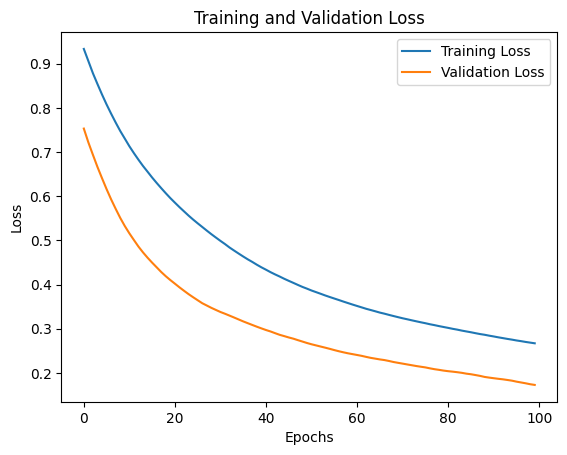

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# log final metrics into wandb
wandb.log({
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "final_confusion_matrix": cm.tolist()
})

# plotting loss curves

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
wandb.log({"Loss Curve": wandb.Image(plt)})
plt.show()

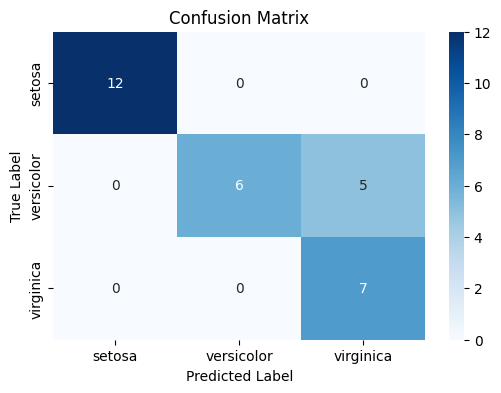

accuracy,▁▁▂▄▄▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
f1_score,▁
loss,██▇▇▆▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
precision,▁
recall,▁
val_accuracy,▁▁▃▆▆▆▆█████████████████████████████████
val_loss,██▇▆▆▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
accuracy,0.83333
best_epoch,99
best_val_loss,0.17283


In [ ]:
# confusion matrix plot

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.show()

# finish WandB tracking
wandb.finish()

##section 2

Hyperparameter Optimization and Automated Hyperparameter Search

In [ ]:
!pip install autogluon autogluon.core autogluon.tabular scikit-learn -qU #installing autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip uninstall scikit-learn -y
!pip install --upgrade scikit-learn   #to succesful import of TabularPredictor making unistallation of skitlearn and again installing

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 80.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-features 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-tabular 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-core 1.2 requires scikit-learn<1.5.3,>=1.4.0, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
#importing autogloun

import autogluon as ag
from autogluon.tabular import TabularPredictor
from autogluon.common import space
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from autogluon.common import space
from autogluon.common import TabularDataset



In [ ]:
param_grid = {
    "batch_size": [2, 4],
    "learning_rate": [1e-3, 1e-5],
    "epochs": [1, 3, 5]
}
grid = ParameterGrid(param_grid)

# track best model
best_model = None
best_f1 = 0
results = []
loss_data = []

In [ ]:
# function to train and evaluate model
def train_eval_model(batch_size, learning_rate, epochs):
    wandb.init(project="mlp-iris", name=f"MLP_Iris_{batch_size}_{learning_rate}_{epochs}", config={
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "epochs": epochs
    })


    model = tf.keras.models.Sequential([
       tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(3, activation='softmax', name='output_layer')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=float(learning_rate)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        callbacks=[WandbCallback(log_weights=True, log_gradients=False,save_model=False,save_graph=False)])

    model.save(f"mlp_iris_model_{batch_size}_{learning_rate}_{epochs}.h5")

    # evaluating model
    y_true = np.argmax(y_test, axis=1)
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    wandb.finish()
    return model, history, acc, f1, y_true, y_pred


Training with batch_size=2, learning_rate=0.001, epochs=1


53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2827 - loss: 1.1448 - val_accuracy: 0.6000 - val_loss: 0.8784


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.38095
best_epoch,0
best_val_loss,0.87843
epoch,0
loss,1.0495
val_accuracy,0.6


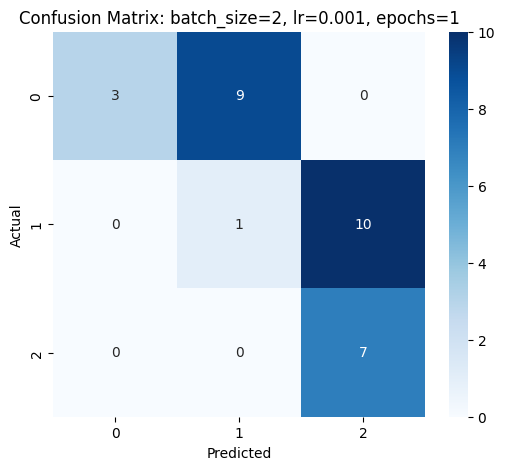

Training with batch_size=2, learning_rate=1e-05, epochs=1


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2203 - loss: 1.3471 - val_accuracy: 0.0667 - val_loss: 1.4801


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.12381
best_epoch,0
best_val_loss,1.48013
epoch,0
loss,1.35734
val_accuracy,0.06667


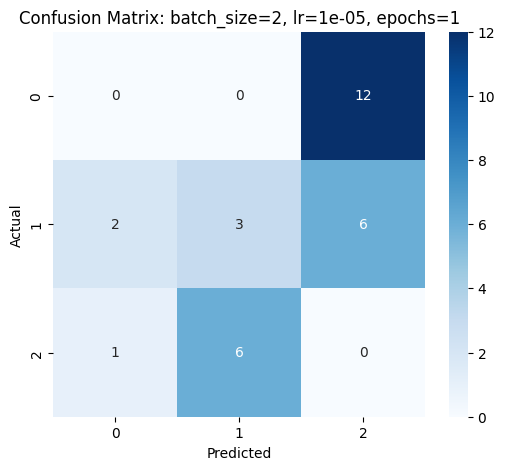

Training with batch_size=2, learning_rate=0.001, epochs=3


Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5701 - loss: 0.8991 - val_accuracy: 0.8667 - val_loss: 0.6914
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8077 - loss: 0.7046 - val_accuracy: 0.8667 - val_loss: 0.5227
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8128 - loss: 0.6364 - val_accuracy: 0.9333 - val_loss: 0.4275


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


accuracy,▁▇█
epoch,▁▅█
loss,█▄▁
val_accuracy,▁▁█
val_loss,█▄▁
accuracy,0.81905
best_epoch,2
best_val_loss,0.42751
epoch,2
loss,0.5792
val_accuracy,0.93333


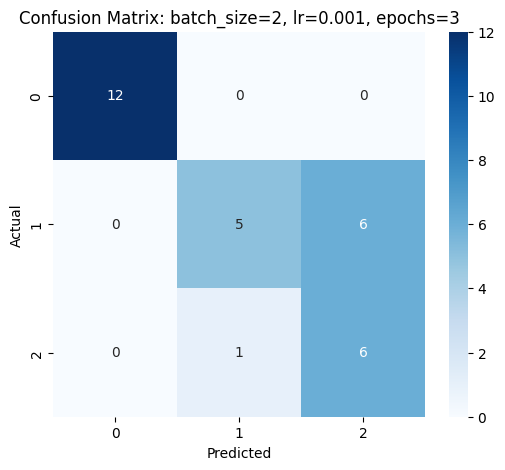

Training with batch_size=2, learning_rate=1e-05, epochs=3


Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2925 - loss: 1.1790 - val_accuracy: 0.3333 - val_loss: 1.1570
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3479 - loss: 1.2092 - val_accuracy: 0.3333 - val_loss: 1.1538
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3506 - loss: 1.1983 - val_accuracy: 0.3333 - val_loss: 1.1506


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


accuracy,▁▁▁
epoch,▁▅█
loss,█▄▁
val_accuracy,▁▁▁
val_loss,█▅▁
accuracy,0.32381
best_epoch,2
best_val_loss,1.15059
epoch,2
loss,1.18427
val_accuracy,0.33333


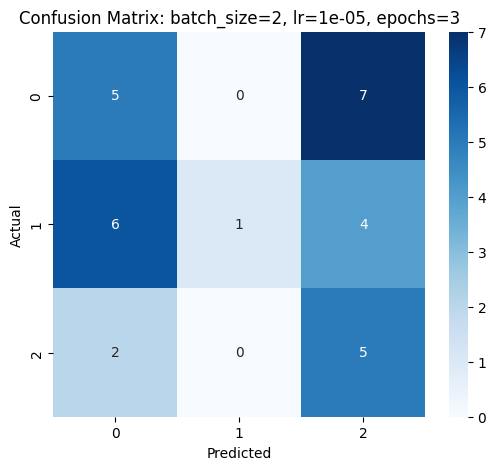

Training with batch_size=2, learning_rate=0.001, epochs=5


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3599 - loss: 1.4386 - val_accuracy: 0.5333 - val_loss: 1.0377
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3464 - loss: 1.2178 - val_accuracy: 0.6000 - val_loss: 0.8528
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5175 - loss: 1.0098 - val_accuracy: 0.6667 - val_loss: 0.7144
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5474 - loss: 0.8562 - val_accuracy: 0.8000 - val_loss: 0.6064
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6316 - loss: 0.7765 - val_accuracy: 0.8667 - val_loss: 0.5244


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


accuracy,▁▁▄▅█
epoch,▁▃▅▆█
loss,█▆▄▂▁
val_accuracy,▁▂▄▇█
val_loss,█▅▄▂▁
accuracy,0.70476
best_epoch,4
best_val_loss,0.52443
epoch,4
loss,0.72549
val_accuracy,0.86667


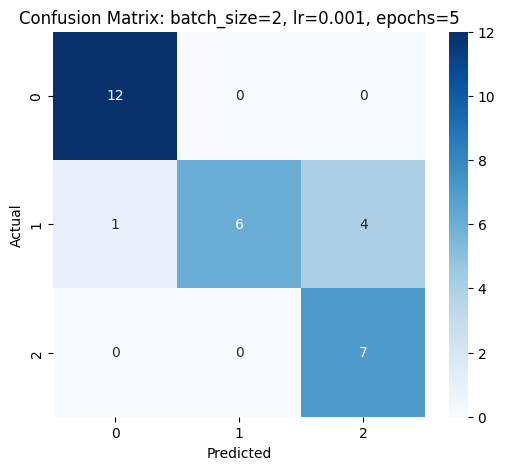

Training with batch_size=2, learning_rate=1e-05, epochs=5


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2060 - loss: 1.2974 - val_accuracy: 0.0000e+00 - val_loss: 1.4128
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1785 - loss: 1.3027 - val_accuracy: 0.0000e+00 - val_loss: 1.4101
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2132 - loss: 1.2740 - val_accuracy: 0.0000e+00 - val_loss: 1.4075
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2115 - loss: 1.2818 - val_accuracy: 0.0000e+00 - val_loss: 1.4048
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0995 - loss: 1.3427 - val_accuracy: 0.0000e+00 - val_loss: 1.4020


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


accuracy,▁▁▁▁█
epoch,▁▃▅▆█
loss,█▆▄▃▁
val_accuracy,▁▁▁▁▁
val_loss,█▆▅▃▁
accuracy,0.17143
best_epoch,4
best_val_loss,1.40202
epoch,4
loss,1.30667
val_accuracy,0


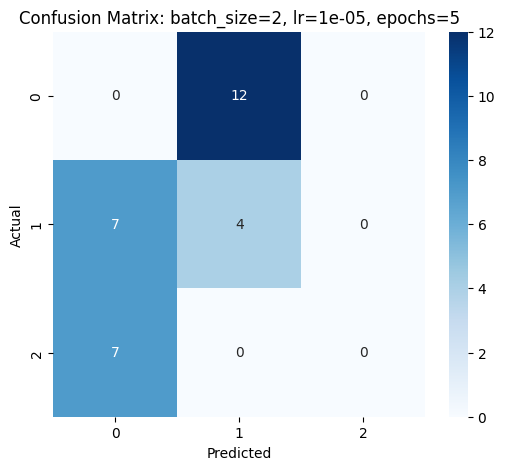

Training with batch_size=4, learning_rate=0.001, epochs=1


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4156 - loss: 1.0154 - val_accuracy: 0.4667 - val_loss: 0.8936


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.3619
best_epoch,0
best_val_loss,0.89356
epoch,0
loss,1.04206
val_accuracy,0.46667


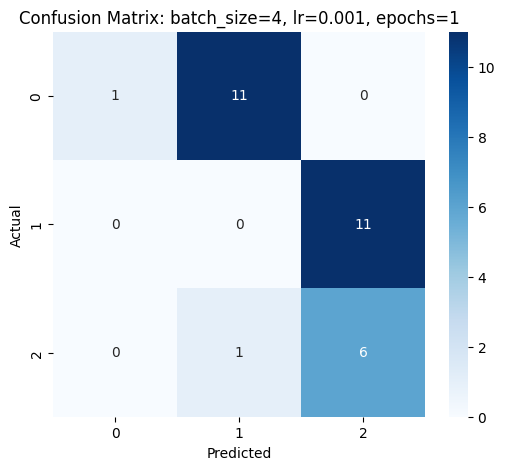

Training with batch_size=4, learning_rate=1e-05, epochs=1


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3940 - loss: 1.0451 - val_accuracy: 0.2667 - val_loss: 1.0789


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.4381
best_epoch,0
best_val_loss,1.07892
epoch,0
loss,1.0406
val_accuracy,0.26667


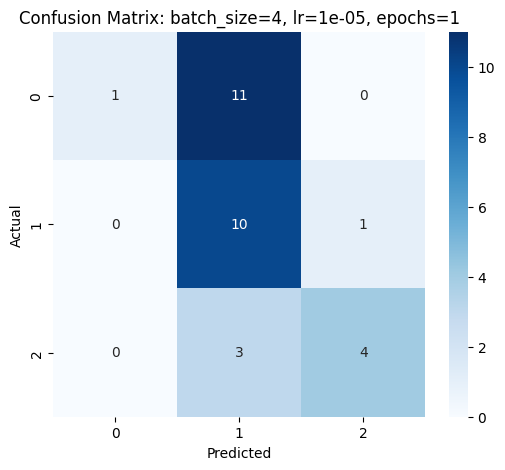

Training with batch_size=4, learning_rate=0.001, epochs=3


Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4861 - loss: 0.9301 - val_accuracy: 0.8000 - val_loss: 0.8154
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7833 - loss: 0.8323 - val_accuracy: 0.8667 - val_loss: 0.7035
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7547 - loss: 0.7649 - val_accuracy: 0.8667 - val_loss: 0.6009


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


accuracy,▁██
epoch,▁▅█
loss,█▄▁
val_accuracy,▁██
val_loss,█▄▁
accuracy,0.7619
best_epoch,2
best_val_loss,0.6009
epoch,2
loss,0.73534
val_accuracy,0.86667


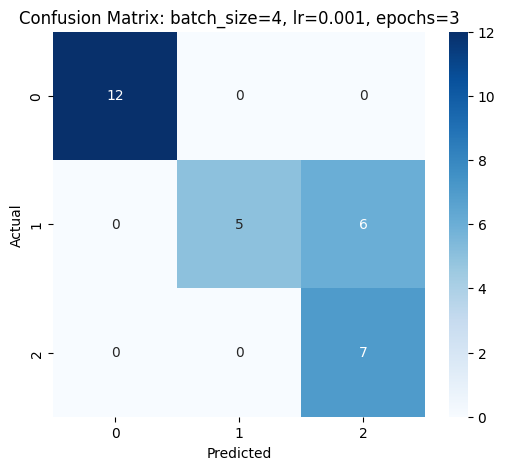

Training with batch_size=4, learning_rate=1e-05, epochs=3


Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0000e+00 - loss: 1.5522 - val_accuracy: 0.0000e+00 - val_loss: 1.7257
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 1.6215 - val_accuracy: 0.0000e+00 - val_loss: 1.7227
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 1.5773 - val_accuracy: 0.0000e+00 - val_loss: 1.7200


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


accuracy,▁▁▁
epoch,▁▅█
loss,█▅▁
val_accuracy,▁▁▁
val_loss,█▄▁
accuracy,0
best_epoch,2
best_val_loss,1.72004
epoch,2
loss,1.57249
val_accuracy,0


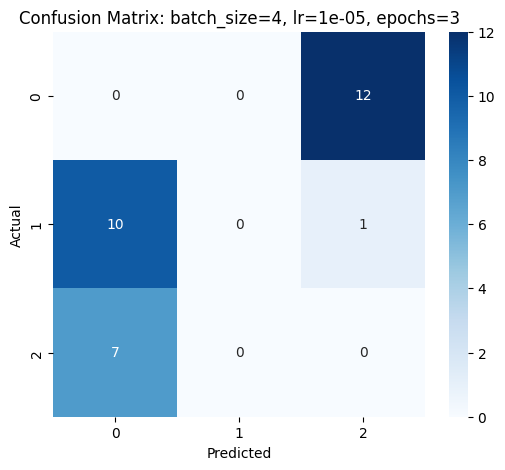

Training with batch_size=4, learning_rate=0.001, epochs=5


Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2476 - loss: 1.3222 - val_accuracy: 0.4000 - val_loss: 1.3261
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4197 - loss: 1.1988 - val_accuracy: 0.4000 - val_loss: 1.1528
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4935 - loss: 1.0334 - val_accuracy: 0.4667 - val_loss: 1.0125
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5514 - loss: 0.9371 - val_accuracy: 0.5333 - val_loss: 0.9056
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6431 - loss: 0.8518 - val_accuracy: 0.9333 - val_loss: 0.7902


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


accuracy,▁▄▅▆█
epoch,▁▃▅▆█
loss,█▆▄▂▁
val_accuracy,▁▁▂▃█
val_loss,█▆▄▃▁
accuracy,0.69524
best_epoch,4
best_val_loss,0.79017
epoch,4
loss,0.83105
val_accuracy,0.93333


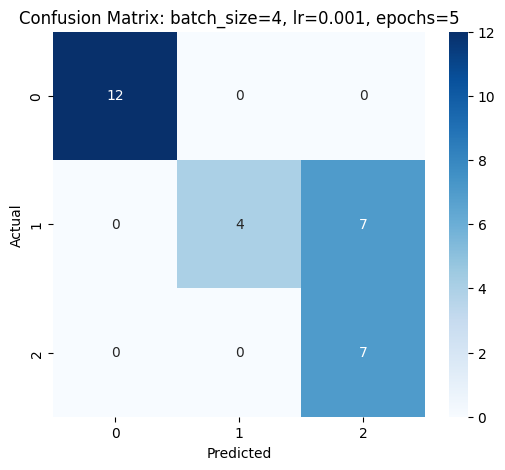

Training with batch_size=4, learning_rate=1e-05, epochs=5


Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3363 - loss: 1.1060 - val_accuracy: 0.1333 - val_loss: 1.2072
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2717 - loss: 1.1325 - val_accuracy: 0.1333 - val_loss: 1.2055
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2737 - loss: 1.1247 - val_accuracy: 0.1333 - val_loss: 1.2040
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3148 - loss: 1.1345 - val_accuracy: 0.1333 - val_loss: 1.2023
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2841 - loss: 1.1397 - val_accuracy: 0.1333 - val_loss: 1.2007


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


accuracy,▁▁▁▁▁
epoch,▁▃▅▆█
loss,█▆▄▃▁
val_accuracy,▁▁▁▁▁
val_loss,█▆▄▃▁
accuracy,0.31429
best_epoch,4
best_val_loss,1.20074
epoch,4
loss,1.11128
val_accuracy,0.13333


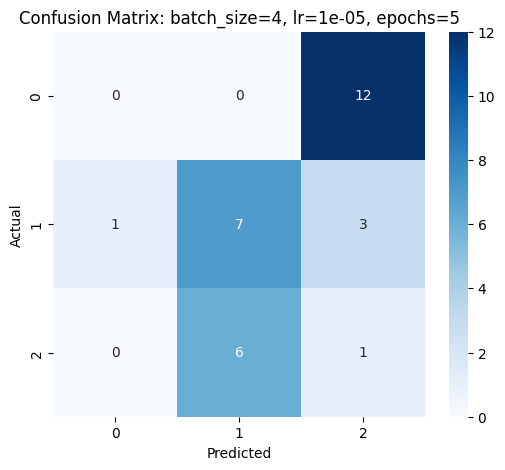

In [ ]:

for params in grid:
    batch_size, learning_rate, epochs = params["batch_size"], float(params["learning_rate"]), params["epochs"]
    print(f"Training with batch_size={batch_size}, learning_rate={learning_rate}, epochs={epochs}")

    model, history, acc, f1, y_true, y_pred = train_eval_model(batch_size, learning_rate, epochs)


    for train_loss, val_loss in zip(history.history['loss'], history.history['val_loss']):
        loss_data.append((train_loss, val_loss, batch_size, learning_rate, epochs))

    #confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: batch_size={batch_size}, lr={learning_rate}, epochs={epochs}")
    plt.show()


    results.append({"params": params, "accuracy": acc, "f1_score": f1})

    if f1 > best_f1:
        best_f1 = f1
        best_model = model

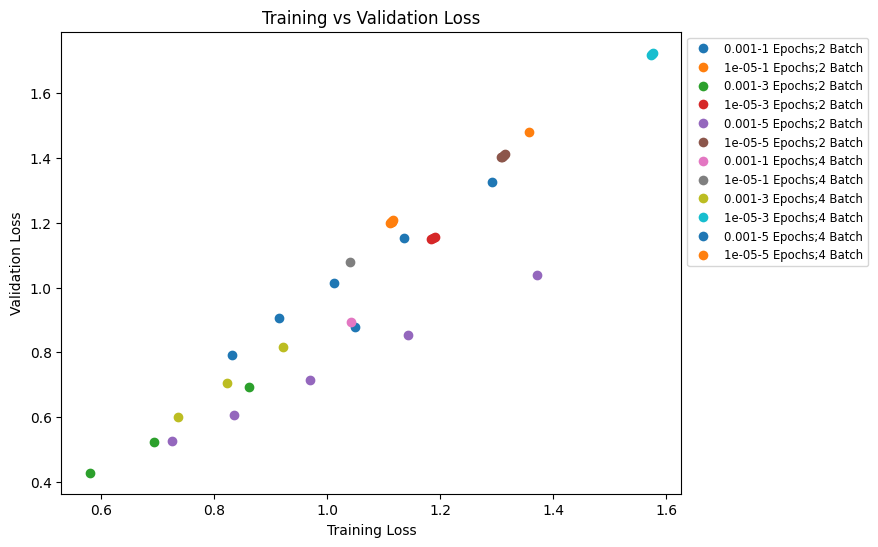

In [ ]:
plt.figure(figsize=(8, 6))
train_losses, val_losses, batch_sizes, learning_rates, epoch_counts = zip(*loss_data)
cmap = plt.get_cmap("tab10")


unique_labels = {}

for i in range(len(loss_data)):
    label = f"{learning_rates[i]}-{epoch_counts[i]} Epochs;{batch_sizes[i]} Batch"


    if label not in unique_labels:
        unique_labels[label] = cmap(len(unique_labels) % 10)

    plt.scatter(train_losses[i], val_losses[i], color=unique_labels[label])


handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in unique_labels.items()]
plt.legend(handles=handles, loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))

plt.xlabel("Training Loss")
plt.ylabel("Validation Loss")
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
for res in results:
    print(f"Params: {res['params']}, Accuracy: {res['accuracy']:.4f}, F1 Score: {res['f1_score']:.4f}")

Params: {'batch_size': 2, 'epochs': 1, 'learning_rate': 0.001}, Accuracy: 0.3667, F1 Score: 0.3310
Params: {'batch_size': 2, 'epochs': 1, 'learning_rate': 1e-05}, Accuracy: 0.1000, F1 Score: 0.1100
Params: {'batch_size': 2, 'epochs': 3, 'learning_rate': 0.001}, Accuracy: 0.7667, F1 Score: 0.7631
Params: {'batch_size': 2, 'epochs': 3, 'learning_rate': 1e-05}, Accuracy: 0.3667, F1 Score: 0.3226
Params: {'batch_size': 2, 'epochs': 5, 'learning_rate': 0.001}, Accuracy: 0.8333, F1 Score: 0.8243
Params: {'batch_size': 2, 'epochs': 5, 'learning_rate': 1e-05}, Accuracy: 0.1333, F1 Score: 0.1086
Params: {'batch_size': 4, 'epochs': 1, 'learning_rate': 0.001}, Accuracy: 0.2333, F1 Score: 0.1782
Params: {'batch_size': 4, 'epochs': 1, 'learning_rate': 1e-05}, Accuracy: 0.5000, F1 Score: 0.4266
Params: {'batch_size': 4, 'epochs': 3, 'learning_rate': 0.001}, Accuracy: 0.8000, F1 Score: 0.7925
Params: {'batch_size': 4, 'epochs': 3, 'learning_rate': 1e-05}, Accuracy: 0.0000, F1 Score: 0.0000
Params: {'

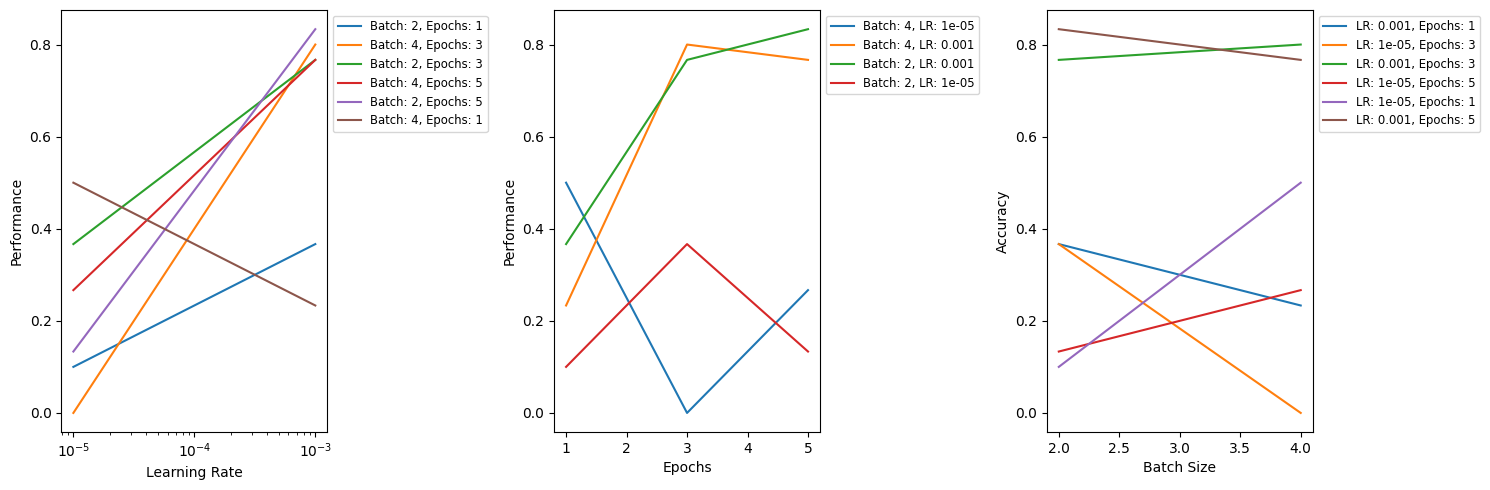

In [ ]:
unique_learning_rates = sorted(set(res["params"]["learning_rate"] for res in results))
unique_epochs = sorted(set(res["params"]["epochs"] for res in results))
unique_batch_sizes = sorted(set(res["params"]["batch_size"] for res in results))


learning_rates = [res["params"]["learning_rate"] for res in results]
epochs = [res["params"]["epochs"] for res in results]
batch_sizes = [res["params"]["batch_size"] for res in results]
accuracies = [res["accuracy"] for res in results]

plt.figure(figsize=(15, 5))

# learning rate vs accuracy
plt.subplot(1, 3, 1)
for bs, ep in set(zip(batch_sizes, epochs)):
    lr_acc = [(lr, acc) for lr, acc, b, e in zip(learning_rates, accuracies, batch_sizes, epochs) if b == bs and e == ep]
    lr_acc.sort()
    plt.plot(*zip(*lr_acc),  label=f"Batch: {bs}, Epochs: {ep}")
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Performance")
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))

# epochs vs cccuracy
plt.subplot(1, 3, 2)
for bs, lr in set(zip(batch_sizes, learning_rates)):
    ep_acc = [(ep, acc) for ep, acc, b, l in zip(epochs, accuracies, batch_sizes, learning_rates) if b == bs and l == lr]
    ep_acc.sort()
    plt.plot(*zip(*ep_acc), label=f"Batch: {bs}, LR: {lr}")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))

# batch size vs accuracy
plt.subplot(1, 3, 3)
for lr, ep in set(zip(learning_rates, epochs)):
    bs_acc = [(bs, acc) for bs, acc, l, e in zip(batch_sizes, accuracies, learning_rates, epochs) if l == lr and e == ep]
    bs_acc.sort()
    plt.plot(*zip(*bs_acc), label=f"LR: {lr}, Epochs: {ep}")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


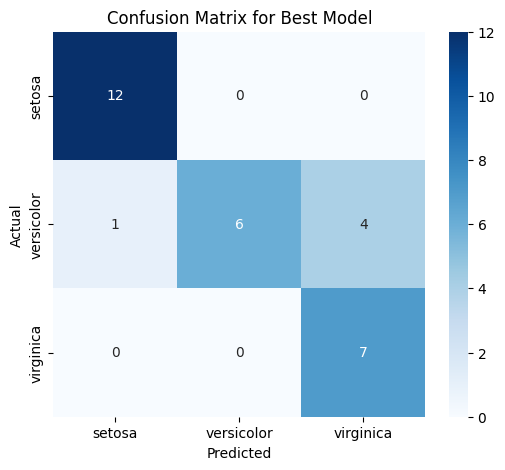


Sample Predictions:

Input: [ 0.18948252 -0.26270364  0.36746819  0.35303182]
Prediction: 2, Truth: 1

Input: [0.55122187 0.69673574 0.484213   0.48831773]
Prediction: 2, Truth: 1

Input: [ 0.55122187 -1.22214302  0.65933022  0.89417548]
Prediction: 2, Truth: 2

Input: [ 1.15412078 -0.50256349  0.54258541  0.2177459 ]
Prediction: 1, Truth: 1

Input: [-0.05167705 -0.74242333  0.01723376 -0.05282593]
Prediction: 1, Truth: 1



In [ ]:

if best_model is not None:

    best_y_true = np.argmax(y_test, axis=1)
    best_y_pred_probs = best_model.predict(X_test)
    best_y_pred = np.argmax(best_y_pred_probs, axis=1)

    # generate confusion matrix
    cm = confusion_matrix(best_y_true, best_y_pred)

    # plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['setosa', 'versicolor', 'virginica'],
                yticklabels=['setosa', 'versicolor', 'virginica'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix for Best Model")
    plt.show()

    # showing 5 random samples with predictions
    sample_indices = np.random.choice(len(X_test), 5, replace=False)
    print("\nSample Predictions:\n")
    for idx in sample_indices:
        print(f"Input: {X_test[idx]}")
        print(f"Prediction: {best_y_pred[idx]}, Truth: {best_y_true[idx]}\n")
else:
    print("No best model found. Ensure at least one model is trained and evaluated.")


In [ ]:
import torch
import torch.nn as nn
import numpy as np
class Model(nn.Module):
    def __init__(self, input_size = 4, hidden_size = 16, output_size = 3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
#now we define the model and then generate a function which will be helpful for to generate TabularData for Autogloun
model_ag = Model()
torch.save(model_ag, 'model_ag.pth')

#function for making numpy array into dataset
def prepare_autogluon_data(features, labels_onehot):
    df = pd.DataFrame(features, columns=data.feature_names)
    df['label'] = np.argmax(labels_onehot, axis = 1)
    return TabularDataset(df)

# dataset creation
train_data = prepare_autogluon_data(X_train, y_train)
val_data = prepare_autogluon_data(X_val, y_val)
test_data = prepare_autogluon_data(X_test, y_test)

## Grid Search

In [ ]:
# We start by making the search space which will be basically parametergrid for the predictor
# search space
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

nn_configs = []

for e in epochs:
    for lr in learning_rates:
        for bs in batch_sizes:
            nn_configs.append({'num_epochs': e, 'learning_rate': lr, 'batch_size': bs, 'activation': 'relu', 'optimizer': 'adam'})

print(nn_configs)

[{'num_epochs': 1, 'learning_rate': 0.001, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 1, 'learning_rate': 0.001, 'batch_size': 4, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 1, 'learning_rate': 1e-05, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 1, 'learning_rate': 1e-05, 'batch_size': 4, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 3, 'learning_rate': 0.001, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 3, 'learning_rate': 0.001, 'batch_size': 4, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 3, 'learning_rate': 1e-05, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 3, 'learning_rate': 1e-05, 'batch_size': 4, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 5, 'learning_rate': 0.001, 'batch_size': 2, 'activation': 'relu', 'optimizer': 'adam'}, {'num_epochs': 5, 'learning_rate': 0.001, 'batch_size': 4, 'activation':

In [ ]:
# Using tabular predictor
grid_predictor = TabularPredictor(
    label = 'label',
    eval_metric = 'accuracy',
    path = "/content/models/grid",
    verbosity = 2
)

In [ ]:
#now fitting hyperparameters while fitting this model
grid_predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit = 10 * 60,
    hyperparameters = {"NN_TORCH":nn_configs})

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.25 GB / 12.67 GB (80.8%)
Disk Space Avail:   71.20 GB / 107.72 GB (66.1%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/grid"
Train Data Rows:    105
Train Data Columns: 4
Label Column:       label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:      

F1-score: 0.9009287925696595
Accuracy: 0.9


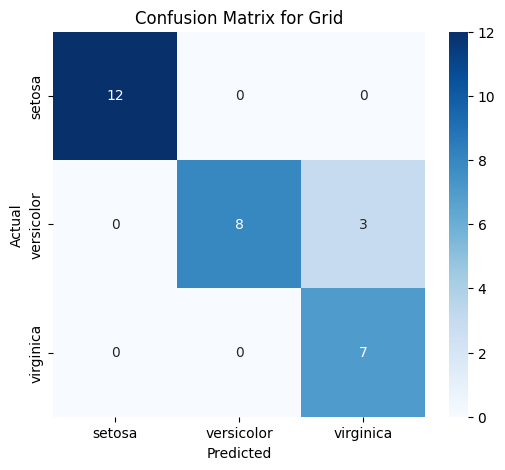

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Getting the Y pred and y_true for accuracy and f1 socre
y_pred = grid_predictor.predict(test_data)
y_true = test_data['label']
metrics = {
    "F1-score": f1_score(y_true, y_pred, average="weighted"),
    "Accuracy": accuracy_score(y_true, y_pred)
}

for key, value in metrics.items():
    print(f"{key}: {value}")
# getting confusion matrix
cm = confusion_matrix(y_true, y_pred)

    # plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['setosa', 'versicolor', 'virginica'],
                yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Grid")
plt.show()

In [ ]:
df_grid = grid_predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      NeuralNetTorch_6   0.952381    accuracy       0.003576  0.156703                0.003576           0.156703            1       True          6
1     NeuralNetTorch_10   0.952381    accuracy       0.004827  0.338830                0.004827           0.338830            1       True         10
2   WeightedEnsemble_L2   0.952381    accuracy       0.004828  0.163210                0.001252           0.006507            2       True         13
3      NeuralNetTorch_5   0.904762    accuracy       0.003632  0.314714                0.003632           0.314714            1       True          5
4      NeuralNetTorch_9   0.904762    accuracy       0.004680  0.667656                0.004680           0.667656            1       True          9
5      NeuralNetTorch_2   0.857143    

In [ ]:
results_grid = grid_predictor.leaderboard(test_data, extra_metrics=['f1_macro'])

extract_hp = lambda model: {k: model.get_info().get('hyperparameters', {}).get(k) for k in ['num_epochs', 'batch_size', 'learning_rate']}

results_grid['hyperparameters'] = [
    extract_hp(grid_predictor._trainer.load_model(name)) for name in results_grid['model']
]

results_grid = results_grid[['model', 'score_val', 'f1_macro', 'hyperparameters']].rename(
    columns={'model': 'Configuration', 'score_val': 'Accuracy', 'f1_macro': 'F1 Macro'}
)

results_grid

,Configuration,Accuracy,F1 Macro,hyperparameters
0,NeuralNetTorch_9,0.904762,1.000000,"{'num_epochs': 5, 'batch_size': 2, 'learning_r..."
1,NeuralNetTorch_5,0.904762,1.000000,"{'num_epochs': 3, 'batch_size': 2, 'learning_r..."
2,NeuralNetTorch_10,0.952381,0.888545,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
3,NeuralNetTorch_6,0.952381,0.888545,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
4,WeightedEnsemble_L2,0.952381,0.888545,"{'num_epochs': None, 'batch_size': None, 'lear..."
5,NeuralNetTorch_2,0.857143,0.733333,"{'num_epochs': 1, 'batch_size': 4, 'learning_r..."
6,NeuralNetTorch,0.619048,0.583333,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
7,NeuralNetTorch_8,0.476190,0.430335,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
8,NeuralNetTorch_12,0.523810,0.411594,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
9,NeuralNetTorch_3,0.476190,0.395238,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."


## Random Search

In [ ]:
# we define the random predictoor and fit that
random_predictor = TabularPredictor(
    label = 'label',
    eval_metric = 'accuracy',
    path = r"/content/models/random",
    verbosity = 2
)

# we now tune the hyperparameters
hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'scheduler': 'local',
    'searcher': 'local_random'
}

random_predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit = 10 * 60,
    hyperparameters = {"NN_TORCH":{'activation': 'relu',
            'optimizer': 'adam','num_epochs': space.Categorical(1, 3, 5),
            'learning_rate': space.Categorical(0.001, 0.00001),
            'batch_size': space.Categorical(2, 4)}},
                        hyperparameter_tune_kwargs = hyperparameter_tune_kwargs,)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.09 GB / 12.67 GB (79.6%)
Disk Space Avail:   71.16 GB / 107.72 GB (66.1%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/random"
Train Data Rows:    105
Train Data Columns: 4
Label Column:       label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:    

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/models/random/models/NeuralNetTorch


Fitted model: NeuralNetTorch/e3bff_00000 ...
	0.8571	 = Validation score   (accuracy)
	8.13s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e3bff_00001 ...
	0.9048	 = Validation score   (accuracy)
	8.07s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e3bff_00002 ...
	0.619	 = Validation score   (accuracy)
	10.16s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e3bff_00003 ...
	0.9524	 = Validation score   (accuracy)
	9.85s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e3bff_00004 ...
	0.381	 = Validation score   (accuracy)
	7.97s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e3bff_00005 ...
	0.4286	 = Validation score   (accuracy)
	7.62s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e3bff_00006 ...
	0.619	 = Validation score   (accuracy)
	8.75s	 = Training   runtime
	0.01s	 = Validation ru

Fitted model: NeuralNetTorch/e3bff_00009 ...
	0.8571	 = Validation score   (accuracy)
	11.12s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 497.06s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/e3bff_00003': 1.0}
	0.9524	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 102.98s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2621.4 rows/s (21 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/random")


F1-score: 0.9009287925696595
Accuracy: 0.9


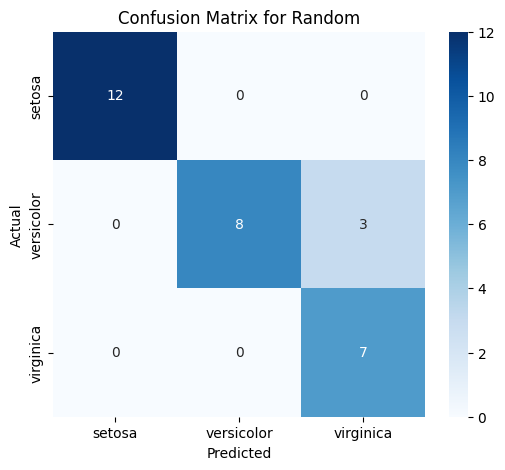

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Getting the Y pred and y_true for accuracy and f1 socre
y_pred = random_predictor.predict(test_data)
y_true = test_data['label']
metrics = {
    "F1-score": f1_score(y_true, y_pred, average="weighted"),
    "Accuracy": accuracy_score(y_true, y_pred)
}

for key, value in metrics.items():
    print(f"{key}: {value}")
# getting confusion matrix
cm = confusion_matrix(y_true, y_pred)

    # plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['setosa', 'versicolor', 'virginica'],
                yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random")
plt.show()

In [ ]:
df_random = random_predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                         model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   NeuralNetTorch/e3bff_00003   0.952381    accuracy       0.006541   9.847407                0.006541           9.847407            1       True          4
1          WeightedEnsemble_L2   0.952381    accuracy       0.008011   9.856213                0.001471           0.008806            2       True         11
2   NeuralNetTorch/e3bff_00001   0.904762    accuracy       0.006788   8.073618                0.006788           8.073618            1       True          2
3   NeuralNetTorch/e3bff_00009   0.857143    accuracy       0.008058  11.116835                0.008058          11.116835            1       True         10
4   NeuralNetTorch/e3bff_00000   0.857143    accuracy       0.013480   8.131847                0.013480           8.131847            1       True  

In [ ]:
results_random = random_predictor.leaderboard(test_data, extra_metrics=['f1_macro'])

extract_hp = lambda model: {k: model.get_info().get('hyperparameters', {}).get(k) for k in ['num_epochs', 'batch_size', 'learning_rate']}

results_random['hyperparameters'] = [
    extract_hp(random_predictor._trainer.load_model(name)) for name in results_random['model']
]

results_random= results_random[['model', 'score_val', 'f1_macro', 'hyperparameters']].rename(
    columns={'model': 'Configuration', 'score_val': 'Accuracy', 'f1_macro': 'F1 Macro'}
)

results_random

,Configuration,Accuracy,F1 Macro,hyperparameters
0,NeuralNetTorch/e3bff_00003,0.952381,0.888545,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
1,WeightedEnsemble_L2,0.952381,0.888545,"{'num_epochs': None, 'batch_size': None, 'lear..."
2,NeuralNetTorch/e3bff_00009,0.857143,0.869091,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
3,NeuralNetTorch/e3bff_00001,0.904762,0.775000,"{'num_epochs': 1, 'batch_size': 4, 'learning_r..."
4,NeuralNetTorch/e3bff_00000,0.857143,0.775000,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
5,NeuralNetTorch/e3bff_00006,0.619048,0.520000,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
6,NeuralNetTorch/e3bff_00002,0.619048,0.604762,"{'num_epochs': 5, 'batch_size': 2, 'learning_r..."
7,NeuralNetTorch/e3bff_00005,0.428571,0.343860,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
8,NeuralNetTorch/e3bff_00007,0.523810,0.356261,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
9,NeuralNetTorch/e3bff_00008,0.333333,0.209235,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."


## Bayesian Search

In [ ]:
fit_config = {
  'num_trials': 10,
  'scheduler': 'local',
  'searcher': 'bayes',
}

bayesian_predictor = TabularPredictor(
    label = 'label',
    eval_metric = 'accuracy',
    path = "/content/models/hb",
    verbosity = 2
)

bayesian_predictor.fit(
    train_data,
    hyperparameters = {
        'NN_TORCH': {
            'num_epochs': space.Categorical(1, 3, 5),
            'learning_rate': space.Categorical(0.001, 0.00001),
            'batch_size': space.Categorical(2, 4),
            'activation': 'relu',
            'optimizer': 'adam'
        }
    },

    time_limit = 60*10,
    presets = 'medium_quality',
    hyperparameter_tune_kwargs = fit_config,
    raise_on_no_models_fitted = True
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.59 GB / 12.67 GB (75.6%)
Disk Space Avail:   71.12 GB / 107.72 GB (66.0%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/hb"
Train Data Rows:    105
Train Data Columns: 4
Label Column:       label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       mu

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 10               |
+---------------------------------------------------+

View detailed results here: /content/models/hb/models/NeuralNetTorch


Fitted model: NeuralNetTorch/f746e99b ...
	0.8571	 = Validation score   (accuracy)
	8.74s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/77159f2a ...
	0.4762	 = Validation score   (accuracy)
	8.58s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/229a2fd9 ...
	0.9524	 = Validation score   (accuracy)
	8.96s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/cb6c7621 ...
	0.381	 = Validation score   (accuracy)
	5.69s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/b60b3204 ...
	0.7143	 = Validation score   (accuracy)
	6.63s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e25273be ...
	0.9524	 = Validation score   (accuracy)
	5.56s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19f29401 ...
	0.9524	 = Validation score   (accuracy)
	6.67s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: 

	0.8571	 = Validation score   (accuracy)
	8.36s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/77e01e4b ...
	0.8571	 = Validation score   (accuracy)
	6.15s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 519.71s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/229a2fd9': 1.0}
	0.9524	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 80.33s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1635.4 rows/s (21 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/hb")


F1-score: 1.0
Accuracy: 1.0


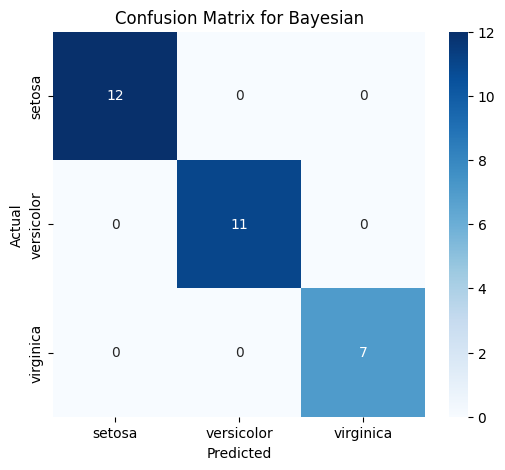

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Getting the Y pred and y_true for accuracy and f1 socre
y_pred = bayesian_predictor.predict(test_data)
y_true = test_data['label']
metrics = {
    "F1-score": f1_score(y_true, y_pred, average="weighted"),
    "Accuracy": accuracy_score(y_true, y_pred)
}

for key, value in metrics.items():
    print(f"{key}: {value}")
# getting confusion matrix
cm = confusion_matrix(y_true, y_pred)

    # plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['setosa', 'versicolor', 'virginica'],
                yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Bayesian")
plt.show()

In [ ]:
df_bayesian = bayesian_predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   NeuralNetTorch/19f29401   0.952381    accuracy       0.006507  6.674913                0.006507           6.674913            1       True          7
1   NeuralNetTorch/e25273be   0.952381    accuracy       0.006752  5.560027                0.006752           5.560027            1       True          6
2   NeuralNetTorch/229a2fd9   0.952381    accuracy       0.011564  8.956388                0.011564           8.956388            1       True          3
3       WeightedEnsemble_L2   0.952381    accuracy       0.012841  8.963074                0.001277           0.006686            2       True         11
4   NeuralNetTorch/a6fb1bb9   0.904762    accuracy       0.008484  7.578294                0.008484           7.578294            1       True          8
5   NeuralNetT

In [ ]:
results_bayesian = bayesian_predictor.leaderboard(test_data, extra_metrics=['f1_macro'])

extract_hp = lambda model: {k: model.get_info().get('hyperparameters', {}).get(k) for k in ['num_epochs', 'batch_size', 'learning_rate']}

results_bayesian['hyperparameters'] = [
    extract_hp(bayesian_predictor._trainer.load_model(name)) for name in results_bayesian['model']
]

results_bayesian= results_bayesian[['model', 'score_val', 'f1_macro', 'hyperparameters']].rename(
    columns={'model': 'Configuration', 'score_val': 'Accuracy', 'f1_macro': 'F1 Macro'}
)

results_bayesian

,Configuration,Accuracy,F1 Macro,hyperparameters
0,NeuralNetTorch/a6fb1bb9,0.904762,1.000000,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
1,NeuralNetTorch/229a2fd9,0.952381,1.000000,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
2,WeightedEnsemble_L2,0.952381,1.000000,"{'num_epochs': None, 'batch_size': None, 'lear..."
3,NeuralNetTorch/e25273be,0.952381,0.961905,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
4,NeuralNetTorch/77e01e4b,0.857143,0.961905,"{'num_epochs': 3, 'batch_size': 4, 'learning_r..."
5,NeuralNetTorch/19f29401,0.952381,0.888545,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
6,NeuralNetTorch/f746e99b,0.857143,0.775000,"{'num_epochs': 1, 'batch_size': 2, 'learning_r..."
7,NeuralNetTorch/8e93abe0,0.857143,0.688312,"{'num_epochs': 5, 'batch_size': 2, 'learning_r..."
8,NeuralNetTorch/b60b3204,0.714286,0.471501,"{'num_epochs': 5, 'batch_size': 4, 'learning_r..."
9,NeuralNetTorch/77159f2a,0.476190,0.408727,"{'num_epochs': 3, 'batch_size': 2, 'learning_r..."


## Hyperband
Since the TabularPrdictor functions are outdated we had to to use ray from tune

In [ ]:
from ray import tune

def train(config):
    hyperparameters = {'NN_TORCH': config}
    predictor = TabularPredictor(label = 'label',
                                 eval_metric = 'accuracy',
                                 path = '/content/models/hyperband',
                                 verbosity = 2)

    # Fit the model
    predictor.fit(
        train_data,
        hyperparameters = hyperparameters,
        time_limit = 600,
        presets = 'medium_quality_faster_train'
    )

    results = predictor.evaluate(val_data, auxiliary_metrics = False)

    tune.report(metric = results['accuracy'])
    return predictor

In [ ]:
#defining the configuration
config = {
    'num_epochs': tune.choice([1, 3, 5]),
    'learning_rate': tune.choice([1e-3, 1e-5]),
    'batch_size': tune.choice([2, 4]),
    'activation': 'relu',
    'optimizer': 'adam'
}
# analyszing

analysis = tune.run(
    train,
    config = config,
    scheduler = tune.schedulers.HyperBandScheduler(metric='metric', mode='max'),
    num_samples = 15,
    raise_on_failed_trial = False
)

+--------------------------------------------------------------+
| Configuration for experiment     train_2025-02-27_18-13-14   |
+--------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator       |
| Scheduler                        HyperBandScheduler          |
| Number of trials                 15                          |
+--------------------------------------------------------------+

View detailed results here: /root/ray_results/train_2025-02-27_18-13-14
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts`

Trial status: 15 PENDING
Current time: 2025-02-27 18:13:14. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+------------------------------------------------------------------------------+
| Trial name          status       num_epochs     learning_rate     bat

2025-02-27 18:13:32,066	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00000
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00000 errored after 0 iterations at 2025-02-27 18:13:32. Total running time: 17s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00000_0_batch_size=4,learning_rate=0.0000,num_epochs=5_2025-02-27_18-13-14/error.txt

Trial train_82a5d_00001 errored after 0 iterations at 2025-02-27 18:13:32. Total running time: 17s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00001_1_batch_size=4,learning_rate=0.0000,num_epochs=5_2025-02-27_18-13-14/error.txt

Trial train_82a5d_00003 started with configuration:
+--------------------------------------------+
| Trial train_82a5d_00003 config             |
+--------------------------------------------+
| activation                            relu |
| batch_size                               2 |
| learning_rate                      0.00001 |
| num

2025-02-27 18:13:49,079	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00003
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00003 errored after 0 iterations at 2025-02-27 18:13:49. Total running time: 34s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00003_3_batch_size=2,learning_rate=0.0000,num_epochs=3_2025-02-27_18-13-14/error.txt

Trial train_82a5d_00002 errored after 0 iterations at 2025-02-27 18:13:49. Total running time: 34s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00002_2_batch_size=2,learning_rate=0.0000,num_epochs=5_2025-02-27_18-13-14/error.txt

Trial train_82a5d_00004 started with configuration:
+------------------------------------------+
| Trial train_82a5d_00004 config           |
+------------------------------------------+
| activation                          relu |
| batch_size                             2 |
| learning_rate                      0.001 |
| num_epochs     

2025-02-27 18:14:07,047	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00005
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00005 errored after 0 iterations at 2025-02-27 18:14:07. Total running time: 52s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00005_5_batch_size=2,learning_rate=0.0000,num_epochs=3_2025-02-27_18-13-14/error.txt


2025-02-27 18:14:07,856	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00004
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00004 errored after 0 iterations at 2025-02-27 18:14:07. Total running time: 53s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00004_4_batch_size=2,learning_rate=0.0010,num_epochs=5_2025-02-27_18-13-14/error.txt

Trial status: 6 ERROR | 9 PENDING
Current time: 2025-02-27 18:14:14. Total running time: 1min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+------------------------------------------------------------------------------+
| Trial name          status       num_epochs     learning_rate     batch_size |
+------------------------------------------------------------------------------+
| train_82a5d_00006   PENDING               1             1e-05              4 |
| train_82a5d_00007   PENDING               5             0.001              2 |
| train_82a5d_00008   PENDING               3             0.001              4 |
| train_82a5d_00009   PENDING            

2025-02-27 18:14:24,065	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00006
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00006 errored after 0 iterations at 2025-02-27 18:14:24. Total running time: 1min 9s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00006_6_batch_size=4,learning_rate=0.0000,num_epochs=1_2025-02-27_18-13-14/error.txt


2025-02-27 18:14:24,980	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00007
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00007 errored after 0 iterations at 2025-02-27 18:14:24. Total running time: 1min 10s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00007_7_batch_size=2,learning_rate=0.0010,num_epochs=5_2025-02-27_18-13-14/error.txt

Trial train_82a5d_00008 started with configuration:
+------------------------------------------+
| Trial train_82a5d_00008 config           |
+------------------------------------------+
| activation                          relu |
| batch_size                             4 |
| learning_rate                      0.001 |
| num_epochs                             3 |
| optimizer                           adam |
+------------------------------------------+

Trial train_82a5d_00009 started with configuration:
+------------------------------------------+
| Trial train_82a5d_00009 config           |
+------------------------------------------+
| activation       

2025-02-27 18:14:41,795	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00008
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00008 errored after 0 iterations at 2025-02-27 18:14:41. Total running time: 1min 27s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00008_8_batch_size=4,learning_rate=0.0010,num_epochs=3_2025-02-27_18-13-14/error.txt


2025-02-27 18:14:42,126	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00009
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00009 errored after 0 iterations at 2025-02-27 18:14:42. Total running time: 1min 27s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00009_9_batch_size=4,learning_rate=0.0010,num_epochs=1_2025-02-27_18-13-14/error.txt

Trial status: 10 ERROR | 5 PENDING
Current time: 2025-02-27 18:14:44. Total running time: 1min 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+------------------------------------------------------------------------------+
| Trial name          status       num_epochs     learning_rate     batch_size |
+------------------------------------------------------------------------------+
| train_82a5d_00010   PENDING               1             0.001              2 |
| train_82a5d_00011   PENDING               3             0.001              2 |
| train_82a5d_00012   PENDING               5             1e-05              2 |
| train_82a5d_00013   PENDING     

2025-02-27 18:15:00,879	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00010
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00010 errored after 0 iterations at 2025-02-27 18:15:00. Total running time: 1min 46s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00010_10_batch_size=2,learning_rate=0.0010,num_epochs=1_2025-02-27_18-13-14/error.txt


2025-02-27 18:15:01,294	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00011
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00011 errored after 0 iterations at 2025-02-27 18:15:01. Total running time: 1min 46s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00011_11_batch_size=2,learning_rate=0.0010,num_epochs=3_2025-02-27_18-13-14/error.txt

Trial train_82a5d_00012 started with configuration:
+--------------------------------------------+
| Trial train_82a5d_00012 config             |
+--------------------------------------------+
| activation                            relu |
| batch_size                               2 |
| learning_rate                      0.00001 |
| num_epochs                               5 |
| optimizer                             adam |
+--------------------------------------------+

Trial train_82a5d_00013 started with configuration:
+--------------------------------------------+
| Trial train_82a5d_00013 config             |
+----------------------------------------

2025-02-27 18:15:16,910	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00013
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00013 errored after 0 iterations at 2025-02-27 18:15:16. Total running time: 2min 2s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00013_13_batch_size=2,learning_rate=0.0000,num_epochs=1_2025-02-27_18-13-14/error.txt


2025-02-27 18:15:17,290	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00012
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00012 errored after 0 iterations at 2025-02-27 18:15:17. Total running time: 2min 2s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00012_12_batch_size=2,learning_rate=0.0000,num_epochs=5_2025-02-27_18-13-14/error.txt

Trial train_82a5d_00014 started with configuration:
+------------------------------------------+
| Trial train_82a5d_00014 config           |
+------------------------------------------+
| activation                          relu |
| batch_size                             2 |
| learning_rate                      0.001 |
| num_epochs                             3 |
| optimizer                           adam |
+------------------------------------------+


2025-02-27 18:15:28,148	ERROR tune_controller.py:1331 -- Trial task failed for trial train_82a5d_00014
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/worker.py", line 904


Trial train_82a5d_00014 errored after 0 iterations at 2025-02-27 18:15:28. Total running time: 2min 13s
Error file: /tmp/ray/session_2025-02-27_17-40-09_501484_196/artifacts/2025-02-27_18-13-14/train_2025-02-27_18-13-14/driver_artifacts/train_82a5d_00014_14_batch_size=2,learning_rate=0.0010,num_epochs=3_2025-02-27_18-13-14/error.txt

Trial status: 15 ERROR
Current time: 2025-02-27 18:15:28. Total running time: 2min 13s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+------------------------------------------------------------------------------+
| Trial name          status       num_epochs     learning_rate     batch_size |
+------------------------------------------------------------------------------+
| train_82a5d_00000   ERROR                 5             1e-05              4 |
| train_82a5d_00001   ERROR                 5             1e-05              4 |
| train_82a5d_00002   ERROR                 5             1e-05              2 |
| train_82a5d_00003   ERROR                 3

In [ ]:
hyperband_predictor = analysis.get_best_result().config

AttributeError: 'ExperimentAnalysis' object has no attribute 'get_best_result'

End of assignment; Do not consider anything after this